# load the dataset

In [ ]:
import os
from pathlib import Path
from lightgbm import LGBMClassifier
from polars import DataFrame

Let's load the dataset to analyze

In [ ]:
from scipy.io import arff
arff_data = arff.loadarff("/content/drive/MyDrive/Colab Notebooks/data.arff")
df = DataFrame(arff_data[0])
raw_data = DataFrame(arff_data[0])

# explore the dataset

In [ ]:
import polars as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from polars import DataFrame

Start by cleaning up, making everything lower case & converting data types

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.replace_column(
    df.get_column_index("class"), df.get_column("class").cast(pd.String)
)

print(df.head())
print(df.shape)

shape: (5, 31)
┌──────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬────────┬───────┐
│ time ┆ v1        ┆ v2        ┆ v3       ┆ … ┆ v27       ┆ v28       ┆ amount ┆ class │
│ ---  ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---    ┆ ---   │
│ f64  ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64       ┆ f64    ┆ str   │
╞══════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪════════╪═══════╡
│ 0.0  ┆ -1.359807 ┆ -0.072781 ┆ 2.536347 ┆ … ┆ 0.133558  ┆ -0.021053 ┆ 149.62 ┆ 0     │
│ 0.0  ┆ 1.191857  ┆ 0.266151  ┆ 0.16648  ┆ … ┆ -0.008983 ┆ 0.014724  ┆ 2.69   ┆ 0     │
│ 1.0  ┆ -1.358354 ┆ -1.340163 ┆ 1.773209 ┆ … ┆ -0.055353 ┆ -0.059752 ┆ 378.66 ┆ 0     │
│ 1.0  ┆ -0.966272 ┆ -0.185226 ┆ 1.792993 ┆ … ┆ 0.062723  ┆ 0.061458  ┆ 123.5  ┆ 0     │
│ 2.0  ┆ -1.158233 ┆ 0.877737  ┆ 1.548718 ┆ … ┆ 0.219422  ┆ 0.215153  ┆ 69.99  ┆ 0     │
└──────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴────────┴───────┘
(28480

Non-null count for all columns

In [ ]:
print((df.null_count() * -1) + pd.Series("", [df.shape[0]]))

shape: (1, 31)
┌────────┬────────┬────────┬────────┬───┬────────┬────────┬────────┬────────┐
│ time   ┆ v1     ┆ v2     ┆ v3     ┆ … ┆ v27    ┆ v28    ┆ amount ┆ class  │
│ ---    ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ i64    ┆ i64    ┆ i64    ┆ i64    ┆   ┆ i64    ┆ i64    ┆ i64    ┆ i64    │
╞════════╪════════╪════════╪════════╪═══╪════════╪════════╪════════╪════════╡
│ 284807 ┆ 284807 ┆ 284807 ┆ 284807 ┆ … ┆ 284807 ┆ 284807 ┆ 284807 ┆ 284807 │
└────────┴────────┴────────┴────────┴───┴────────┴────────┴────────┴────────┘


Null count for all columns

In [ ]:
print(df.null_count())

shape: (1, 31)
┌──────┬─────┬─────┬─────┬───┬─────┬─────┬────────┬───────┐
│ time ┆ v1  ┆ v2  ┆ v3  ┆ … ┆ v27 ┆ v28 ┆ amount ┆ class │
│ ---  ┆ --- ┆ --- ┆ --- ┆   ┆ --- ┆ --- ┆ ---    ┆ ---   │
│ u32  ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32 ┆ u32 ┆ u32    ┆ u32   │
╞══════╪═════╪═════╪═════╪═══╪═════╪═════╪════════╪═══════╡
│ 0    ┆ 0   ┆ 0   ┆ 0   ┆ … ┆ 0   ┆ 0   ┆ 0      ┆ 0     │
└──────┴─────┴─────┴─────┴───┴─────┴─────┴────────┴───────┘


Percentage of unique values

In [ ]:
print(df["class"].value_counts(normalize=True))

shape: (2, 2)
┌───────┬────────────┐
│ class ┆ proportion │
│ ---   ┆ ---        │
│ str   ┆ f64        │
╞═══════╪════════════╡
│ 1     ┆ 0.001727   │
│ 0     ┆ 0.998273   │
└───────┴────────────┘


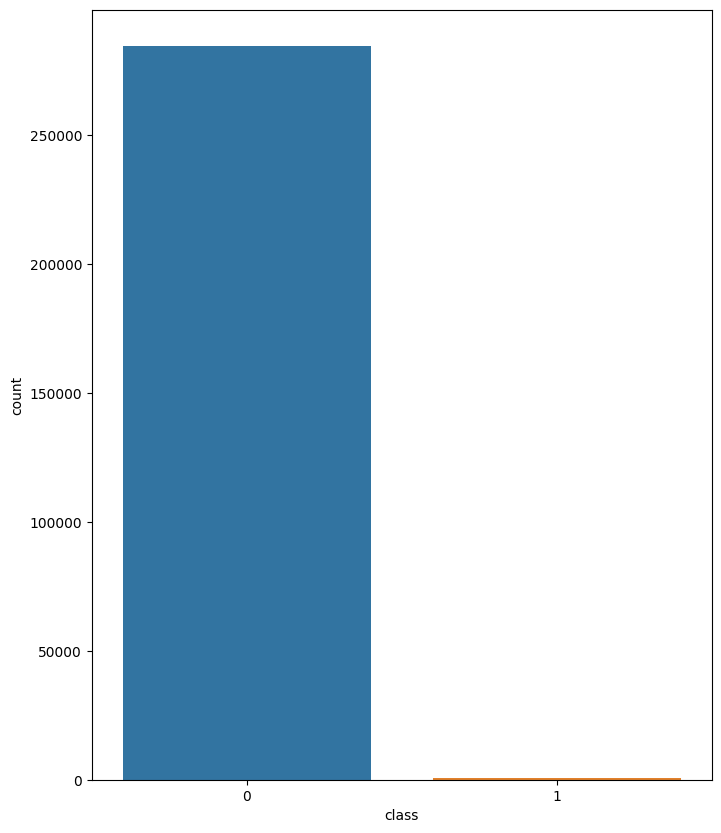

In [ ]:
# Plot
f, ax = plt.subplots(figsize=(8, 10))
_ax = sns.countplot(x="class", data=df, hue="class", legend=False)

Describe time and amount values

In [ ]:
print(df[["time", "amount"]].describe())

shape: (9, 3)
┌────────────┬──────────────┬────────────┐
│ statistic  ┆ time         ┆ amount     │
│ ---        ┆ ---          ┆ ---        │
│ str        ┆ f64          ┆ f64        │
╞════════════╪══════════════╪════════════╡
│ count      ┆ 284807.0     ┆ 284807.0   │
│ null_count ┆ 0.0          ┆ 0.0        │
│ mean       ┆ 94813.859575 ┆ 88.349619  │
│ std        ┆ 47488.145955 ┆ 250.120109 │
│ min        ┆ 0.0          ┆ 0.0        │
│ 25%        ┆ 54202.0      ┆ 5.6        │
│ 50%        ┆ 84692.0      ┆ 22.0       │
│ 75%        ┆ 139321.0     ┆ 77.17      │
│ max        ┆ 172792.0     ┆ 25691.16   │
└────────────┴──────────────┴────────────┘


On average, each transaction happens every time:mean seconds

This two columns have outliers. It can be seen from the difference w max value

In [ ]:
# Get data about fraud transaction vs normal transactions (count, columns)
fraud = df.filter(pd.col("class") == "1")
normal = df.filter(pd.col("class") == "0")
print(f"Shape of Fraud Transactions: {fraud.shape}")
print(f"Shape of Normal Transactions: {normal.shape}")

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


Compare side by side the fraud and normal amounts

In [ ]:
n = normal["amount"].describe()
# Combine horizontally
print(
    pd.concat(
        [
            n.select("statistic"),
            fraud["amount"]
            .describe()
            .select("value")
            .rename({"value": "fraud_amount"}),
            n.select("value").rename({"value": "normal_amount"}),
        ],
        how="horizontal",
    )
)

shape: (9, 3)
┌────────────┬──────────────┬───────────────┐
│ statistic  ┆ fraud_amount ┆ normal_amount │
│ ---        ┆ ---          ┆ ---           │
│ str        ┆ f64          ┆ f64           │
╞════════════╪══════════════╪═══════════════╡
│ count      ┆ 492.0        ┆ 284315.0      │
│ null_count ┆ 0.0          ┆ 0.0           │
│ mean       ┆ 122.211321   ┆ 88.291022     │
│ std        ┆ 256.683288   ┆ 250.105092    │
│ min        ┆ 0.0          ┆ 0.0           │
│ 25%        ┆ 1.0          ┆ 5.65          │
│ 50%        ┆ 9.29         ┆ 22.0          │
│ 75%        ┆ 105.89       ┆ 77.05         │
│ max        ┆ 2125.87      ┆ 25691.16      │
└────────────┴──────────────┴───────────────┘


In [ ]:
print(fraud["amount"].value_counts(sort=True).head())

shape: (5, 2)
┌────────┬───────┐
│ amount ┆ count │
│ ---    ┆ ---   │
│ f64    ┆ u32   │
╞════════╪═══════╡
│ 1.0    ┆ 113   │
│ 0.0    ┆ 27    │
│ 99.99  ┆ 27    │
│ 0.76   ┆ 17    │
│ 0.77   ┆ 10    │
└────────┴───────┘


Check the monetary amount involved in frauds

With fraud transactions, the average amount of fraud is 122.22 USD, the highest is 2125 USD, the lowest is 0 and the maximum amount is 1 USD with 113 times.

<Axes: title={'center': 'Distribution of Transaction Time'}, ylabel='Count'>

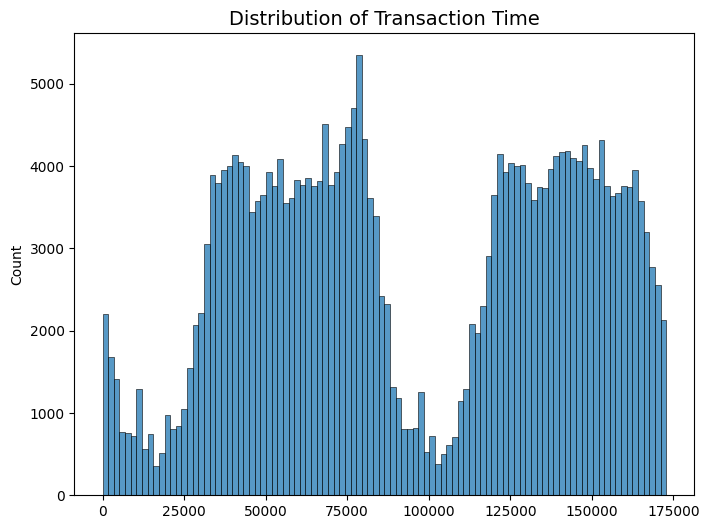

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Transaction Time", fontsize=14)
sns.histplot(df["time"], bins=100)

This data set contains two-day trading information, looking at the distribution chart we see two peaks and two troughs. Most likely, the two peaks are transactions during the day because of the high volume of transactions, and the two bottoms are transactions at night when everyone is asleep.

Text(0.5, 1.0, 'Distribution of Genuine Transactions')

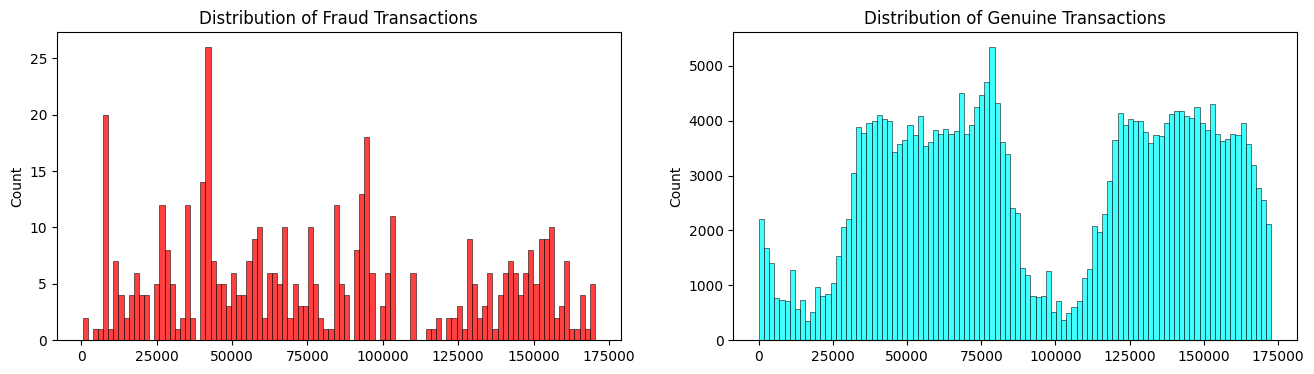

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
axs[0].set_title("Distribution of Fraud Transactions")
sns.histplot(fraud["time"], bins=100, color="red", ax=axs[0])

sns.histplot(normal["time"], bins=100, color="cyan", ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

Text(0.5, 1.0, 'Distribution of Normal Transactions')

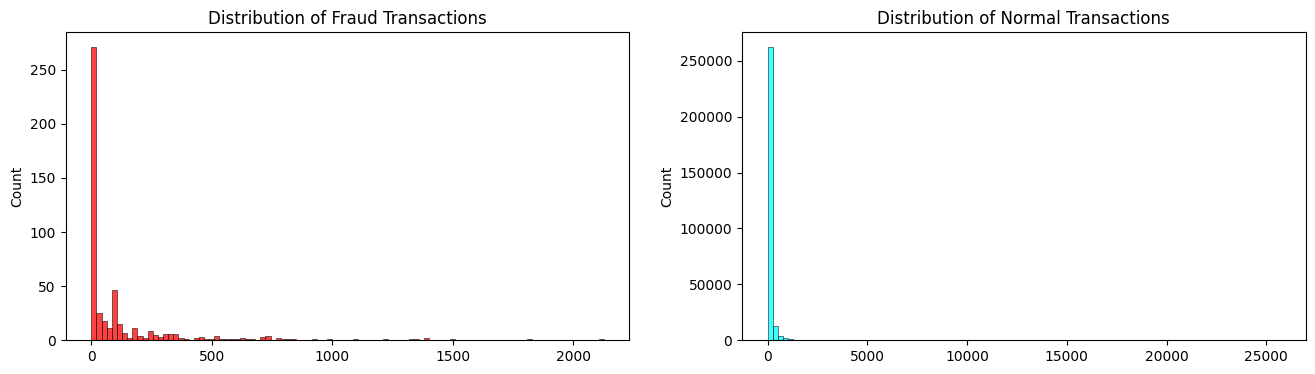

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
sns.histplot(fraud["amount"], bins=100, color="red", ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(normal["amount"], bins=100, color="cyan", ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

Log transforms are useful when applied to skewed distributions because they tend to expand values in the lower magnitude range and tend to compress or reduce values in the magnitude range.

In [ ]:
df.insert_column(-1, pd.Series("amount_log", np.log(df["amount"] + 0.0001)))

print(df.head())
# Convert everything to float, otherwise we get errors with string - float operations
_tmp = df.get_column("class").cast(pd.Float64)
df = df.drop("class")
df.insert_column(-1, _tmp)

shape: (5, 32)
┌──────┬───────────┬───────────┬──────────┬───┬───────────┬────────┬────────────┬───────┐
│ time ┆ v1        ┆ v2        ┆ v3       ┆ … ┆ v28       ┆ amount ┆ amount_log ┆ class │
│ ---  ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---    ┆ ---        ┆ ---   │
│ f64  ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64    ┆ f64        ┆ str   │
╞══════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪════════╪════════════╪═══════╡
│ 0.0  ┆ -1.359807 ┆ -0.072781 ┆ 2.536347 ┆ … ┆ -0.021053 ┆ 149.62 ┆ 5.008099   ┆ 0     │
│ 0.0  ┆ 1.191857  ┆ 0.266151  ┆ 0.16648  ┆ … ┆ 0.014724  ┆ 2.69   ┆ 0.989578   ┆ 0     │
│ 1.0  ┆ -1.358354 ┆ -1.340163 ┆ 1.773209 ┆ … ┆ -0.059752 ┆ 378.66 ┆ 5.936639   ┆ 0     │
│ 1.0  ┆ -0.966272 ┆ -0.185226 ┆ 1.792993 ┆ … ┆ 0.061458  ┆ 123.5  ┆ 4.816242   ┆ 0     │
│ 2.0  ┆ -1.158233 ┆ 0.877737  ┆ 1.548718 ┆ … ┆ 0.215153  ┆ 69.99  ┆ 4.248354   ┆ 0     │
└──────┴───────────┴───────────┴──────────┴───┴───────────┴────────┴────────────┴────

time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,amount_log
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,5.008099
0.0,1.191857,0.266151,0.16648,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0.0,0.989578
1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,5.936639
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.1083,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5,0.0,4.816242
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.11967,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0.0,4.248354
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.35617,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.68292,1.475829,0.213454,0.111864,1.01448,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0,-0.261235
172787.0,-0.732789,-0.05508,2.03503,-0.738589,0.868229,1.058415,0.02433,0.294869,0.5848,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0,3.210444
172788.0,1.919565,-0.301254,-3.24964,-0.557828,2.630515,3.03126,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0,4.217743


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


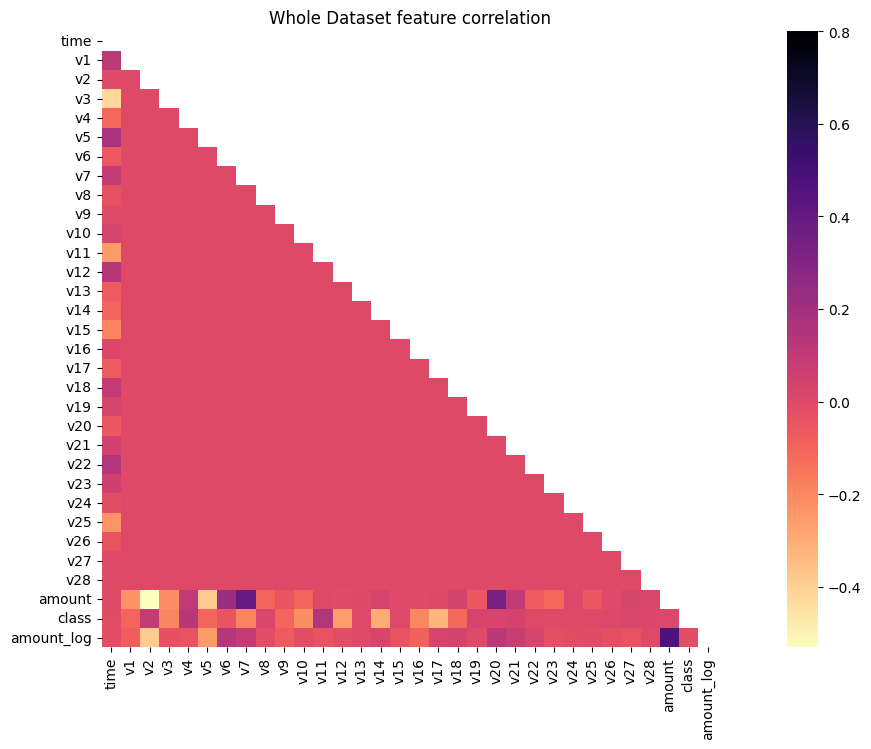

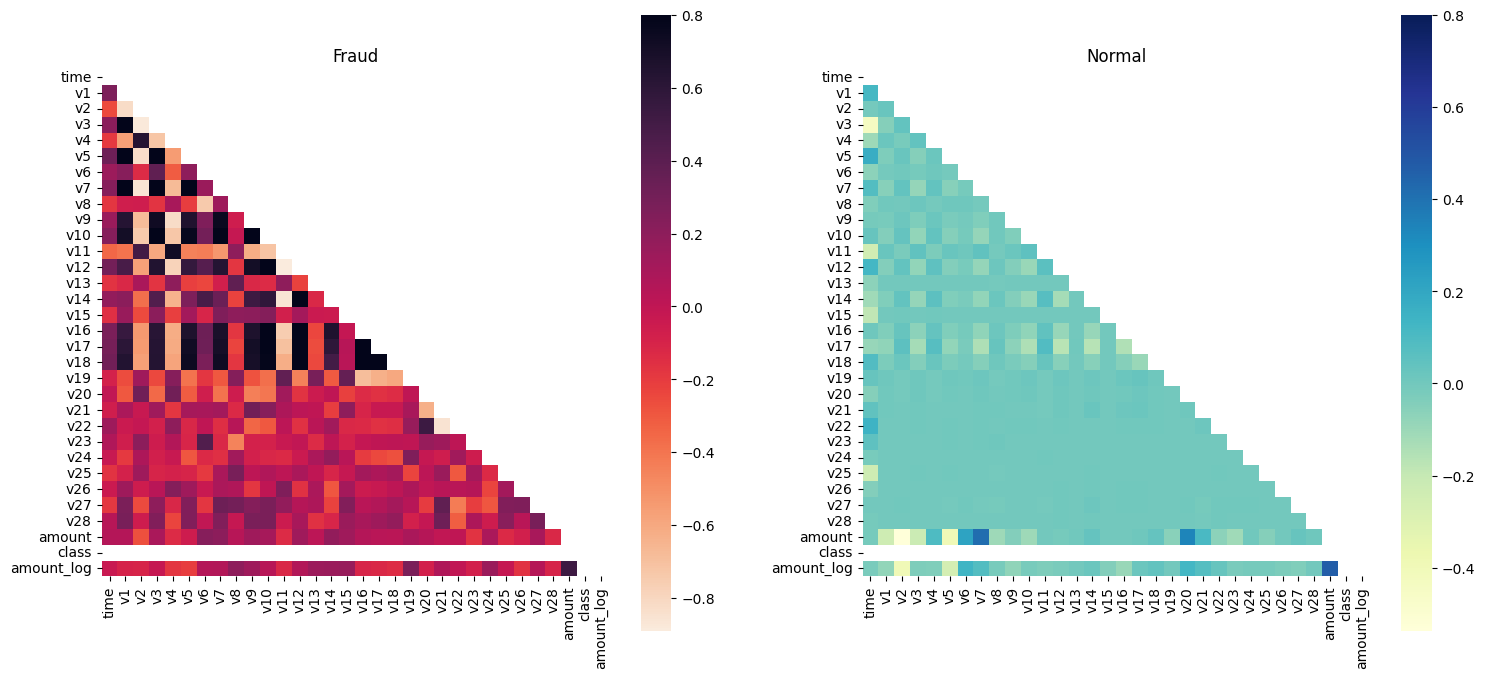

In [ ]:
# Feature correlation study
corr = df.corr().to_pandas()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, (ax1) = plt.subplots(1, 1, figsize=(18, 8))
sns.heatmap(
    df.corr().to_pandas(), vmax=0.8, square=True, ax=ax1, cmap="magma_r", mask=mask
)
ax1.set_title("Whole Dataset feature correlation")
ax1.set_yticklabels(df.columns, rotation=0)

# Prepare plot in which we'll put two correlation matrix (fraud and normal)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Get data about fraud transaction vs normal transactions (count, columns)
fraud = df.filter(pd.col("class") == 1)
normal = df.filter(pd.col("class") == 0)

# mask used to remove useless (mirrored) data.
sns.heatmap(
    fraud.corr().to_pandas(),
    vmax=0.8,
    square=True,
    ax=ax1,
    cmap="rocket_r",
    mask=mask,
)
ax1.set_title("Fraud")
ax1.set_yticklabels(df.columns, rotation=0)
sns.heatmap(
    normal.corr().to_pandas(),
    vmax=0.8,
    square=True,
    ax=ax2,
    cmap="YlGnBu",
    mask=mask,
)
ax2.set_title("Normal")
ax2.set_yticklabels(df.columns, rotation=0)
plt.show()

# prepare the dataset

In [ ]:
# Start by cleaning up, making everything lower case & converting data types
raw_data.columns = [col.lower() for col in raw_data.columns]
raw_data.replace_column(
    raw_data.get_column_index("class"), raw_data.get_column("class").cast(pd.String)
)
# Scale amount by log
raw_data.insert_column(-1, pd.Series("amount_log", np.log(raw_data["amount"] + 0.0001)))
# Convert everything to float, otherwise we get errors with string - float operations
raw_data.replace_column(
    raw_data.get_column_index("class"),raw_data.get_column("class").cast(pd.Float64)
)

time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,amount_log,class
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,5.008099,0.0
0.0,1.191857,0.266151,0.16648,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0.989578,0.0
1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,5.936639,0.0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.1083,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5,4.816242,0.0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.11967,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,4.248354,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.35617,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.68292,1.475829,0.213454,0.111864,1.01448,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,-0.261235,0.0
172787.0,-0.732789,-0.05508,2.03503,-0.738589,0.868229,1.058415,0.02433,0.294869,0.5848,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,3.210444,0.0
172788.0,1.919565,-0.301254,-3.24964,-0.557828,2.630515,3.03126,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,4.217743,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
x = raw_data.drop(["class", "time"])
y = raw_data["class"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

print(x_train.shape)
print(x_test.shape)

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

print("Original dataset shape %s" % Counter(y_train))

smt = SMOTE(random_state=42)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print("Resampled dataset shape %s" % Counter(y_train_smt))

(227845, 30)
(56962, 30)
Original dataset shape Counter({0.0: 227454, 1.0: 391})
Resampled dataset shape Counter({0.0: 227454, 1.0: 227454})


# explore different models results

In [ ]:
import time

from matplotlib import pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    cohen_kappa_score,
    f1_score,
    classification_report,
    roc_curve,
    ConfusionMatrixDisplay,
)

In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

In [ ]:
def plot_spider_chart(values: list[float]):
    metrics = ["Accuracy", "ROC AUC", "F1 Score", "Cohen Kappa"]
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]  # Close the loop
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color="blue", alpha=0.25)
    ax.plot(angles, values, color="blue", marker="o")
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticklabels([])
    ax.set_title("Model Performance Radar Chart", size=14, pad=20)
    plt.show()

In [ ]:
def run_model(model, x_train, y_train, x_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(x_train, y_train, verbose=0)
    else:
        model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    # Accuracy is useful with balanced datasets, but kinda useless with imbalanced data.
    # If I'm operating in a sector in which 90% of data is class 1, then a model that only says
    # class 1 has 90% accuracy
    print("Accuracy = {}".format(accuracy))
    # Performance metric for binary classification (YES/NO)
    # Works well with unbalanced data
    print("ROC Area under Curve = {}".format(roc_auc))
    # When a model predicts 'X', how often is it correct? Minimizes false alarms
    if verbose:
        print("Precision  = {}".format(precision))
        # Minimizes missed positives
        print("Recall  = {}".format(recall))
        # The F1 score is a single metric that balances precision and recall. It answers:
        # "Can the model achieve high precision and high recall at the same time?"
        print("F1 Score  = {}".format(f1))
    # Cohen's Kappa measures how much better your model is compared to random chance
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(x_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Updated confusion matrix plotting
    ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=model.classes_,  # Optional: show class labels
    )
    plt.title("Confusion Matrix")
    plt.show()

    return model, accuracy, roc_auc, f1, coh_kap, time_taken

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
# Logistic Regression with SMOTE
def logistic_regression(x_train_smt, y_train_smt, x_test, y_test):
    params_lr = {"penalty": "l1", "solver": "liblinear"}  # "class_weight": "balanced"}

    model_lrsmt = LogisticRegression(**params_lr)
    (
        model_lrsmt,
        accuracy_lrsmt,
        roc_auc_lrsmt,
        f1_score_lrsmt,
        coh_kap_lrsmt,
        tt_lrsmt,
    ) = run_model(model_lrsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt, tt_lrsmt

In [ ]:
# Decision Tree
def decision_tree(x_train_smt, y_train_smt, x_test, y_test):
    params_dt = {"max_depth": 16, "max_features": "sqrt"}

    model_dtsmt = DecisionTreeClassifier(**params_dt)
    (
        model_dtsmt,
        accuracy_dtsmt,
        roc_auc_dtsmt,
        f1_score_dtsmt,
        coh_kap_dtsmt,
        tt_dtsmt,
    ) = run_model(model_dtsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt, tt_dtsmt

In [ ]:
def random_forest(x_train_smt, y_train_smt, x_test, y_test):
    # Random Forest with SMOTE
    model_rfsmt = RandomForestClassifier()
    (
        model_rfsmt,
        accuracy_rfsmt,
        roc_auc_rfsmt,
        f1_score_rfsmt,
        coh_kap_rfsmt,
        tt_rfsmt,
    ) = run_model(model_rfsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt, tt_rfsmt

In [ ]:
def lightGBM(x_train_smt, y_train_smt, x_test, y_test):
    # Light GBM with SMOTE

    model_lgbsmt = lgb.LGBMClassifier()
    (
        model_lgbsmt,
        accuracy_lgbsmt,
        roc_auc_lgbsmt,
        f1_score_lgbsmt,
        coh_kap_lgbsmt,
        tt_lgbsmt,
    ) = run_model(model_lgbsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt, tt_lgbsmt

Accuracy = 0.9757206558758471
ROC Area under Curve = 0.9581885546497704
Precision  = 0.06453804347826086
Recall  = 0.9405940594059405
F1 Score  = 0.12078830260648442
Cohen's Kappa = 0.11786090105243119
Time taken = 26.73088574409485
              precision    recall  f1-score   support

         0.0    0.99989   0.97578   0.98769     56861
         1.0    0.06454   0.94059   0.12079       101

    accuracy                        0.97572     56962
   macro avg    0.53221   0.95819   0.55424     56962
weighted avg    0.99823   0.97572   0.98615     56962



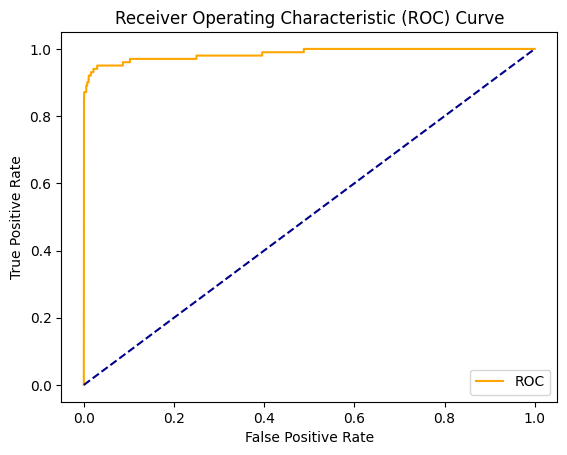

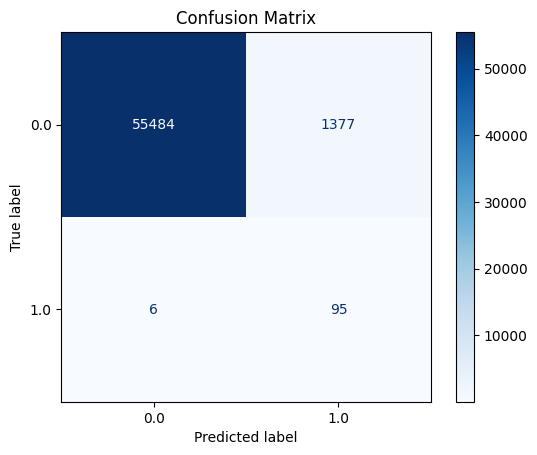

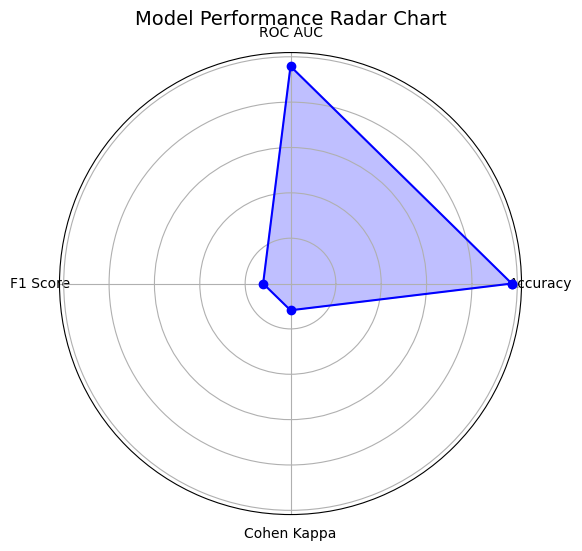

In [ ]:
accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt, tt_lrsmt = (
    logistic_regression(x_train_smt, y_train_smt, x_test, y_test)
)
plot_spider_chart(
    [accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt],
)

Accuracy = 0.9916611074049366
ROC Area under Curve = 0.9118142191806631
Precision  = 0.15498154981549817
Recall  = 0.8316831683168316
F1 Score  = 0.26127527216174184
Cohen's Kappa = 0.25906045833563596
Time taken = 7.1138365268707275
              precision    recall  f1-score   support

         0.0    0.99970   0.99195   0.99581     56861
         1.0    0.15498   0.83168   0.26128       101

    accuracy                        0.99166     56962
   macro avg    0.57734   0.91181   0.62854     56962
weighted avg    0.99820   0.99166   0.99450     56962



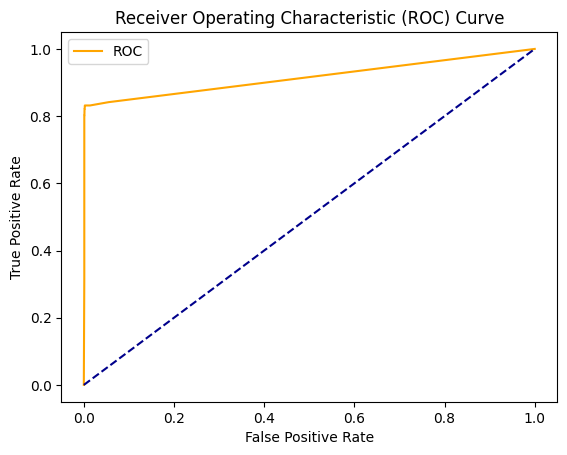

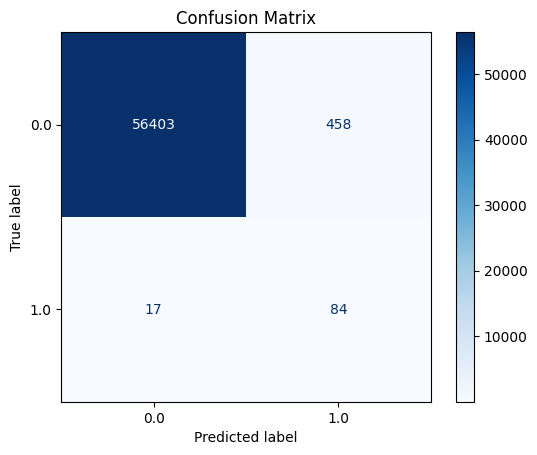

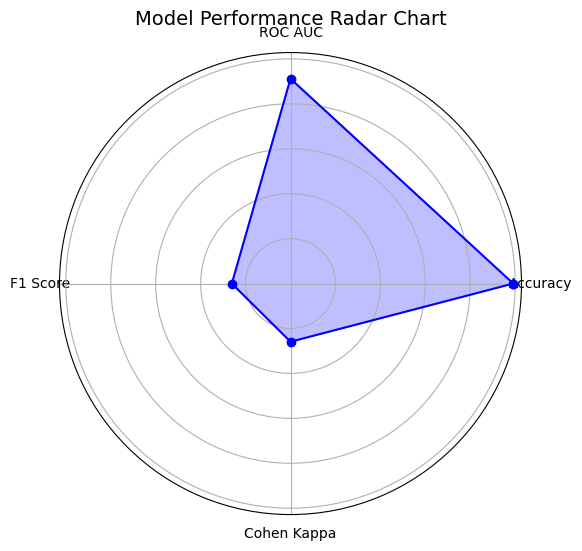

In [ ]:
accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt, tt_dtsmt = (
    decision_tree(x_train_smt, y_train_smt, x_test, y_test)
)
plot_spider_chart(
    [accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt]
)

Accuracy = 0.9995084442259752
ROC Area under Curve = 0.9206865587281543
Precision  = 0.8762886597938144
Recall  = 0.8415841584158416
F1 Score  = 0.8585858585858586
Cohen's Kappa = 0.8583397534497652
Time taken = 616.6099526882172
              precision    recall  f1-score   support

         0.0    0.99972   0.99979   0.99975     56861
         1.0    0.87629   0.84158   0.85859       101

    accuracy                        0.99951     56962
   macro avg    0.93800   0.92069   0.92917     56962
weighted avg    0.99950   0.99951   0.99950     56962



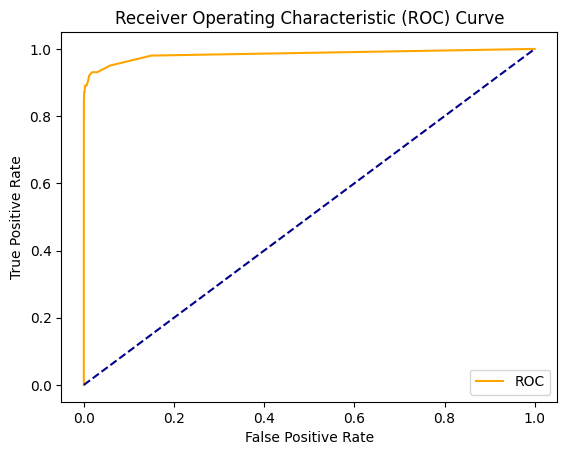

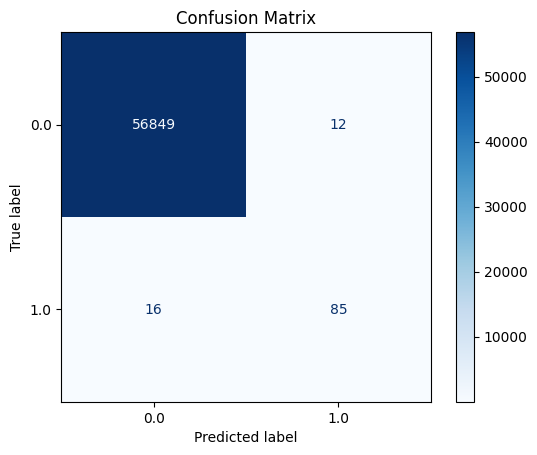

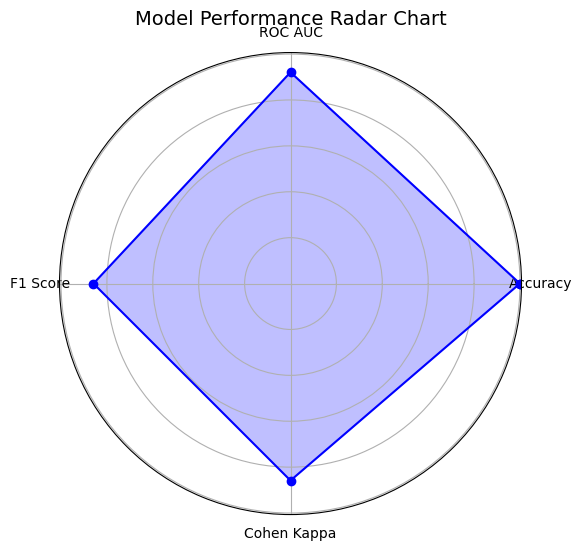

In [ ]:
accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt, tt_rfsmt = (
    random_forest(x_train_smt, y_train_smt, x_test, y_test)
)
plot_spider_chart(
    [accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt]
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227454, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy = 0.9987886661282961
ROC Area under Curve = 0.9252677320984767
Precision  = 0.6142857142857143
Recall  = 0.8514851485148515
F1 Score  = 0.7136929460580913
Cohen's Kappa = 0.7131019225286181
Time taken = 14.109031677246094
              precision    recall  f1-score   support

         0.0    0.99974   0.99905   0.99939     56861
         1.0    0.61429   0.85149   0.71369       101

    accuracy                        0.99879     56962
   macro avg    0.80701   0.92527   0.85654     56962
weighted avg    0.99905   0.99879   0.99889     56962



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


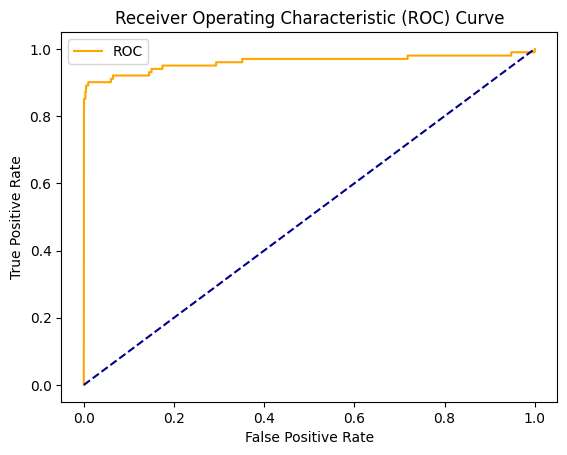

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


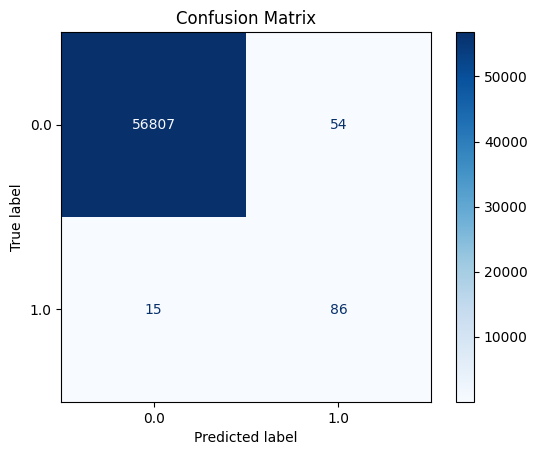

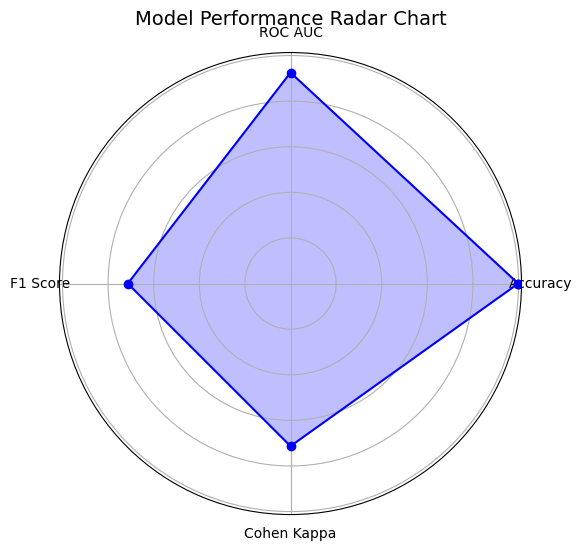

In [ ]:
accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt, tt_lgbsmt = (
    lightGBM(x_train_smt, y_train_smt, x_test, y_test)
)
plot_spider_chart(
    [accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt]
)

In [ ]:
accuracy_scores = [accuracy_lrsmt, accuracy_dtsmt, accuracy_rfsmt, accuracy_lgbsmt]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_dtsmt, roc_auc_rfsmt, roc_auc_lgbsmt]
f1_scores = [f1_score_lrsmt, f1_score_dtsmt, f1_score_rfsmt, f1_score_lgbsmt]
coh_kap_scores = [coh_kap_lrsmt, coh_kap_dtsmt, coh_kap_rfsmt, coh_kap_lgbsmt]
tt = [tt_lrsmt, tt_dtsmt, tt_rfsmt, tt_lgbsmt]

In [ ]:
def visualize_model_accuracy_and_time(model_data):
    data = pd.DataFrame(model_data)

    fig, ax1 = plt.subplots(figsize=(12, 10))
    ax1.set_title(
        "Model Comparison: Accuracy and Time taken for execution", fontsize=13
    )
    color = "tab:green"
    ax1.set_xlabel("Model", fontsize=13)
    ax1.set_ylabel("Time taken", fontsize=13, color=color)
    ax2 = sns.barplot(
        x="Model",
        y="Time taken",
        data=data,
        palette="summer",
        hue="Model",
        legend=False,
    )
    ax1.tick_params(axis="y")
    ax2 = ax1.twinx()
    color = "tab:red"
    ax2.set_ylabel("F1 Score", fontsize=13, color=color)
    ax2 = sns.lineplot(x="Model", y="F1 Score", data=data, sort=False, color=color)
    ax2.tick_params(axis="y", color=color)
    plt.show()


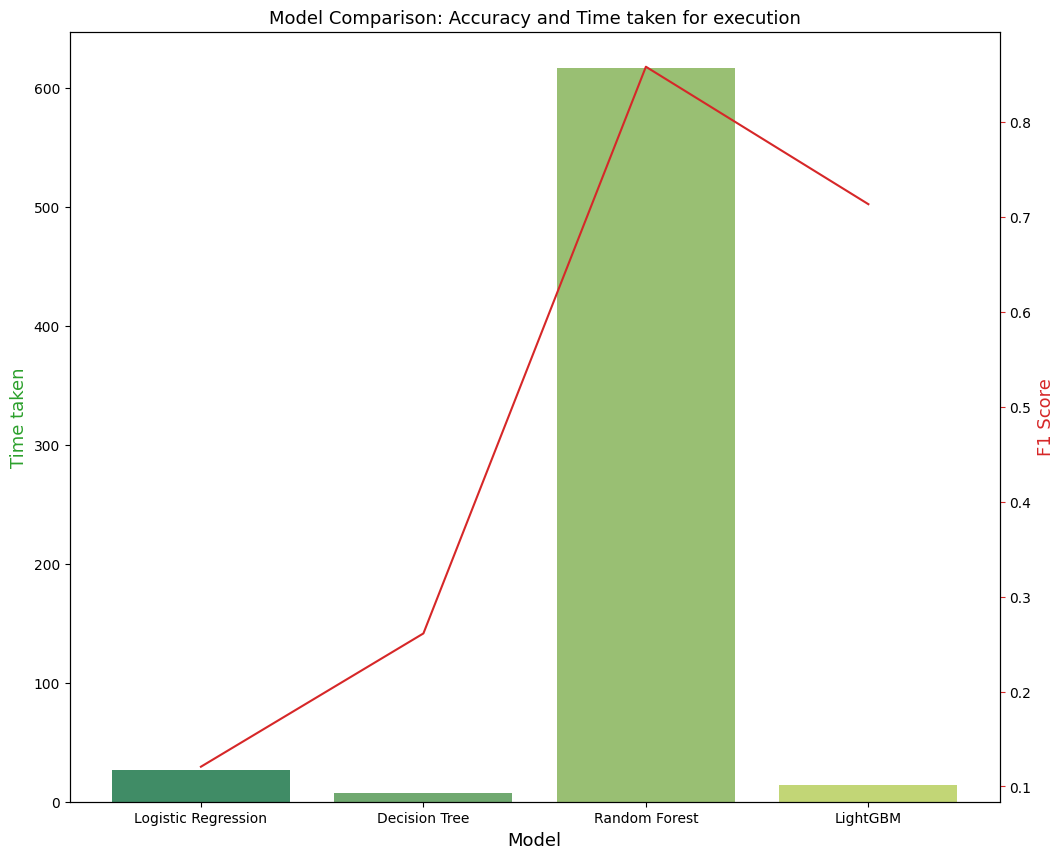

In [ ]:
model_data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        # "Catboost",
        # "XGBoost",
        # "AdaBoost",
        # "TabNet",
    ],
    "Accuracy": accuracy_scores,
    "ROC_AUC": roc_auc_scores,
    "F1 Score": f1_scores,
    "Cohen_Kappa": coh_kap_scores,
    "Time taken": tt,
}
visualize_model_accuracy_and_time(model_data)

# train

In [ ]:
from sklearn.metrics import (
    make_scorer,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
def objective(trial, x_train_smt, y_train_smt):
    max_depth = trial.suggest_int("max_depth", 2, 14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        # "n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
        "verbose": -1,
    }
    # scoring = {'accuracy' : make_scorer(accuracy_score),
    #      'precision' : make_scorer(precision_score),
    #     'recall' : make_scorer(recall_score),
    #    'f1_score' : make_scorer(f1_score)}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**param_grid)
    model.fit(x_train_smt, y_train_smt)
    scores = cross_val_score(
        model,
        x_train_smt,
        y_train_smt,
        scoring=make_scorer(f1_score, average="weighted", labels=[1]),
        cv=cv,
        n_jobs=-1,
    )
    return np.mean(scores)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.9 MB/s eta 0:00:00


In [ ]:
import optuna

[I 2025-05-10 13:01:38,175] A new study created in memory with name: no-name-a0e94bb5-fc9d-4e7a-9d89-a395edeeccdf
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-10 13:02:48,695] Trial 0 finished with value: 0.9940765613823267 and parameters: {'max_depth': 8, 'learning_rate': 0.12070054745367871, 'num_leaves': 58, 'min_data_in_leaf': 66, 'max_bin': 250, 'lambda_l1': 45, 'lambda_l2': 25, 'min_gain_to_split': 11.258884884284878, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 0.9940765613823267.
/usr/local/lib/python3.11/dist-packages/op

	Best value (Accuracy): 0.99975
	Best params:
		max_depth: 13
		learning_rate: 0.24750694819744248
		num_leaves: 8103
		min_data_in_leaf: 378
		max_bin: 153
		lambda_l1: 0
		lambda_l2: 30
		min_gain_to_split: 0.026722717193631916
		bagging_fraction: 0.8
		bagging_freq: 1
		feature_fraction: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy = 0.9992977774656788
ROC Area under Curve = 0.93046444160077
Precision  = 0.7699115044247787
Recall  = 0.8613861386138614
F1 Score  = 0.8130841121495327
Cohen's Kappa = 0.8127334482777326
Time taken = 7.630599737167358
              precision    recall  f1-score   support

         0.0    0.99975   0.99954   0.99965     56861
         1.0    0.76991   0.86139   0.81308       101

    accuracy                        0.99930     56962
   macro avg    0.88483   0.93046   0.90637     56962
weighted avg    0.99935   0.99930   0.99932     56962



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


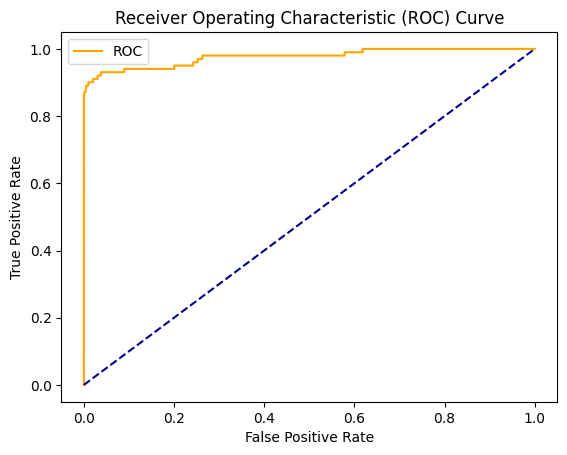

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


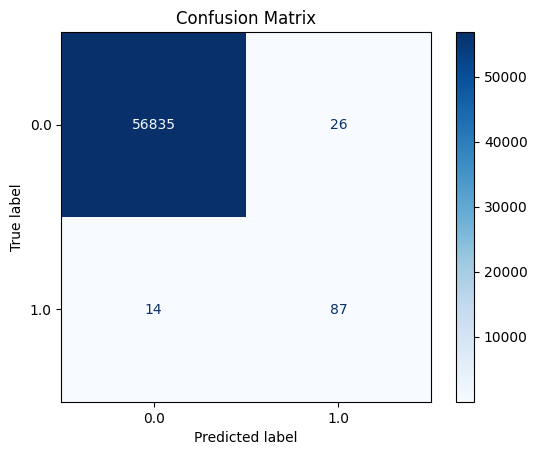

(LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, feature_fraction=0.2,
                lambda_l1=0, lambda_l2=0, learning_rate=0.22690320686746146,
                max_bin=61, max_depth=13, min_data_in_leaf=168,
                min_gain_to_split=1.2780588498979437, num_leaves=501,
                verbose=-1),
 0.9992977774656788,
 np.float64(0.93046444160077),
 0.8130841121495327,
 np.float64(0.8127334482777326),
 7.630599737167358)

In [42]:
study = optuna.create_study(direction="maximize")
func = lambda trial: objective(trial, x_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print("\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

param_lgb = {
    "max_depth": 13,
    "learning_rate": 0.22690320686746146,
    "num_leaves": 501,
    "min_data_in_leaf": 168,
    "max_bin": 61,
    "lambda_l1": 0,
    "lambda_l2": 0,
    "min_gain_to_split": 1.2780588498979437,
    "bagging_fraction": 0.9,
    "bagging_freq": 1,
    "feature_fraction": 0.2,
    "verbose": -1,
}

lgb_opt = lgb.LGBMClassifier(**param_lgb)
run_model(lgb_opt, x_train_smt, y_train_smt, x_test, y_test)

In [43]:
import plotly.graph_objs as go
import plotly.subplots as tls
import plotly.io as pio

In [44]:
pio.renderers.default = "colab"

model = lgb_opt
y_pred = model.predict(x_test)
y_score = model.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [45]:
# Conf matrix
conf_matrix = confusion_matrix(y_test, y_pred)
trace1 = go.Heatmap(
    z=conf_matrix,
    x=["0 (pred)", "1 (pred)"],
    y=["0 (true)", "1 (true)"],
    xgap=2,
    ygap=2,
    text=conf_matrix,
    colorscale="Viridis",
    showscale=False,
)

In [46]:
# Show metrics
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)
F1_score = 2 * (
    ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn)))
)

show_metrics = pd.DataFrame(data=[[Accuracy, Precision, Recall, F1_score]])
show_metrics = show_metrics.transpose()

colors = ["gold", "lightgreen", "lightcoral", "lightskyblue"]
trace2 = go.Bar(
    x=show_metrics.to_numpy()[0],
    y=["Accuracy", "Precision", "Recall", "F1_score"],
    text=np.round(show_metrics.to_numpy()[0], 4),
    textposition="auto",
    orientation="h",
    opacity=0.8,
    marker=dict(color=colors, line=dict(color="#000000", width=1.5)),
)

In [47]:
# Roc curve
model_roc_auc = round(roc_auc_score(y_test, y_score), 3)
fpr, tpr, t = roc_curve(y_test, y_score)
trace3 = go.Scatter(
    x=fpr,
    y=tpr,
    name="Roc : " + str(model_roc_auc),
    line=dict(color="rgb(22, 96, 167)", width=2),
    fill="tozeroy",
)
trace4 = go.Scatter(
    x=[0, 1], y=[0, 1], line=dict(color="black", width=1.5, dash="dot")
)

In [48]:
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
trace5 = go.Scatter(
    x=recall,
    y=precision,
    name="Precision" + str(precision),
    line=dict(color="lightcoral", width=2),
    fill="tozeroy",
)

In [49]:
# Feature importance
coefficients = pd.DataFrame({"coefficients": model.feature_importances_})
column_data = pd.DataFrame(
    {"features": df.drop("amount_log").drop("class").columns}
)
# Combine and process
coef_sumry = (
    coefficients.hstack(column_data)
    .sort("coefficients", descending=True)
    .filter(pd.col("coefficients") != 0)
)
# Feature coefficients visualization
trace6 = go.Bar(
    x=coef_sumry["features"].to_list(),
    y=coef_sumry["coefficients"].to_list(),
    name="coefficients",
    marker=dict(
        color=coef_sumry["coefficients"].to_list(),
        colorscale="Viridis",
        line=dict(width=0.6, color="black"),
    ),
)

In [50]:
# Cumulative gain

pos = (
    DataFrame(y_test).to_dummies().to_numpy()
)
pos = pos[:, 1]
npos = np.sum(pos)
index = np.argsort(y_score)
index = index[::-1]
sort_pos = pos[index]
# cumulative sum
cpos = np.cumsum(sort_pos)
# recall
recall = cpos / npos
# size obs test
n = y_test.shape[0]
size = np.arange(start=1, stop=369, step=1)
# proportion
size = size / n
# plots
trace7 = go.Scatter(
    x=size,
    y=recall,
    name="Lift curve",
    line=dict(color="gold", width=2),
    fill="tozeroy",
)

In [51]:
# Subplots
fig = tls.make_subplots(
    rows=4,
    cols=2,
    print_grid=False,
    specs=[[{}, {}], [{}, {}], [{"colspan": 2}, None], [{"colspan": 2}, None]],
    subplot_titles=(
        "Confusion Matrix",
        "Metrics",
        "ROC curve" + " " + "(" + str(model_roc_auc) + ")",
        "Precision - Recall curve",
        "Cumulative gains curve",
        "Feature importance",
    ),
)

fig.add_trace(trace1, 1, 1)
fig.add_trace(trace2, 1, 2)
fig.add_trace(trace3, 2, 1)
fig.add_trace(trace4, 2, 1)
fig.add_trace(trace5, 2, 2)
fig.add_trace(trace6, 4, 1)
fig.add_trace(trace7, 3, 1)

fig["layout"].update(
    showlegend=False,
    title="Model performance report" + "LightGBM after tuning",
    autosize=False,
    height=1500,
    width=830,
    plot_bgcolor="rgba(240,240,240, 0.95)",
    paper_bgcolor="rgba(240,240,240, 0.95)",
    margin=dict(b=195),
)
fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
fig["layout"]["xaxis3"].update(dict(title="false positive rate"))
fig["layout"]["yaxis3"].update(dict(title="true positive rate"))
fig["layout"]["xaxis4"].update(dict(title="recall"), range=[0, 1.05])
fig["layout"]["yaxis4"].update(dict(title="precision"), range=[0, 1.05])
fig["layout"]["xaxis5"].update(dict(title="Percentage contacted"))
fig["layout"]["yaxis5"].update(dict(title="Percentage positive targeted"))
fig.layout.title.font.size = 14

fig.show("colab")